In [3]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns

import pickle
import string
import time
from tqdm import tqdm

from pathlib import Path

In [2]:
names = {"Log. Reg": "#999999", 
         "Lin. SVM":"#f781bf", 
         "SVM":"#a65628", 
         "kNN": "#ffff33", 
         "RF":"#ff7f00", 
         "MLP":"#984ea3", 
         "SorF":"#4daf4a", 
         "CNN":"#377eb8",
         "MF":"#e41a1c"}

paths = {"Circle Segments":"circle_experiment/s-rerf_circle_runs_all.csv",
         "Orthogonal Bars":"hvbar/s-rerf_runs_all_algo.csv",
         "Noisy Impulse":"time_series_experiment/s-rerf_impulse_experiment_rerf_1run.csv",
         }

cnn_paths = {"Circle Segments":"circle_experiment/circle_cnn_results_5runs.csv",
             "Orthogonal Bars":"hvbar/hvbar_cnn_results_5runs.csv",
             "Noisy Impulse":"time_series_experiment/impulse_cnn_results_5runs.csv",
             }

In [3]:
def plot_simulation(ax, name, path, cnn_path, yvar='Lhat',ylog=False):
    ## Algos \ CNN
    dat = pd.read_csv(path)

    d1 = pd.DataFrame(columns = ['classifier', 'n', yvar, 'color'])

    k = 0
    for ni in np.unique(dat['n']):
        for cl in np.unique(dat['classifier']):

            tmp = dat[np.logical_and(dat['classifier'] == cl,dat['n'] == ni)][yvar]
            tmp = np.mean(tmp)
            if cl == 'RerF':
                cl = 'SorF'
            elif cl == 'S-RerF':
                cl = 'MF'
            d1.loc[k] = [cl] + [ni] + [tmp] + [names[cl]]
            k += 1
    
    ## CNN ADDON
    dat2 = pd.read_csv(cnn_path)

    for ni in np.unique(dat2['n']):
        for cl in np.unique(dat2['classifier']):

            tmp = dat2[np.logical_and(dat2['classifier'] == cl,dat2['n'] == ni)][yvar]
            tmp = np.mean(tmp)

            d1.loc[k] = [cl] + [ni] + [tmp] + [names[cl]]
            k += 1

    ## Plot All
    for key in names.keys():
        grp = d1[d1['classifier'] == key] 
        if len(grp) == 0:
            continue
        ax = grp.plot(ax=ax, kind='line', x='n', y=yvar, label=key, \
                c = names[key], alpha =1)
        ax.set_xscale('log')
        if ylog:
            ax.set_yscale('log')

    #ax.title.set_text('%s Classification' % name)
    #ax.legend(loc='best',title='Algorithm', borderpad=0.1, labelspacing=0.5, bbox_to_anchor=(1, 0.5))
    ax.get_legend().remove()
    ax.set_xlabel('')
    #ax.text(-0.1, 1.1, "%s" % string.ascii_uppercase[n], transform=ax.transAxes, size=15, weight='bold')

In [8]:
fontsize = 9
sns.set(); sns.set(style="darkgrid", rc={'font.size':fontsize,
                                         'figure.titlesize':fontsize,
                                         'legend.fontsize': fontsize,
                                         'xtick.labelsize': fontsize,
                                         'ytick.labelsize': fontsize,
                                         'axes.labelsize': fontsize,
                                         'axes.titlesize':fontsize})
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']

/home/rflperry/miniconda3/envs/rerf/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 


<Figure size 432x288 with 0 Axes>

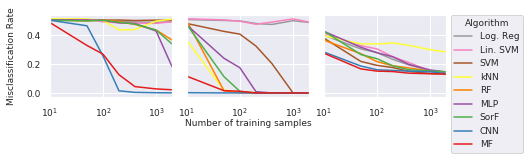

In [9]:
plt.clf()
fig, axes = plt.subplots(1,3, figsize = (7.1,1.5), sharey=True, sharex=False)


for ax,(name,path),i in zip(axes, paths.items(),range(len(axes))):
    plot_simulation(ax,name,path,cnn_paths[name],yvar='Lhat')


handles, labels = axes[1].get_legend_handles_labels()
lgd = axes[2].legend(handles, labels, title='Algorithm', loc='upper left' ,bbox_to_anchor = (1.04,1), borderaxespad=0)#bbox_to_anchor = (0.55,-0.15,1,1), borderaxespad=0)

bax = fig.add_subplot(111, frameon=False)

bax.grid(None)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

plt.ylabel('Misclassification Rate') #Mean Loss
plt.xlabel('Number of training samples')
plt.tight_layout()
fig.subplots_adjust(wspace=0.12)
#plt.savefig('./s-rerf_3plot_experiment.pdf',dpi=300,format='pdf')
#bbox = matplotlib.transforms.Bbox([[0,0, [6.5, 3]])
fig.savefig('./s-rerf_3plot_experiment_cnn.pdf',bbox_inches='tight', bbox_extra_artists=(lgd,),format='pdf')

plt.show()

## Time Plots

<Figure size 432x288 with 0 Axes>

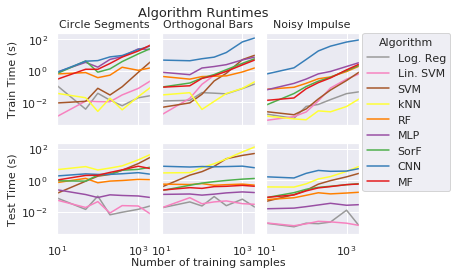

In [157]:
plt.clf()
fig, axes = plt.subplots(2,3, figsize = (5.4,3.7), sharey=True, sharex=True)
ylog=True

for ax,(name,path) in zip(axes[0], paths.items()):
    plot_simulation(ax,name,path,cnn_paths[name],yvar='trainTime',ylog=ylog)
    ax.set_title(name)
    #ax.set_ylim((0,50))
    
for ax,(name,path) in zip(axes[1], paths.items()):
    plot_simulation(ax,name,path,cnn_paths[name],yvar='testTime',ylog=ylog)
    #ax.set_ylim((0,50))

ttl = fig.suptitle('Algorithm Runtimes',fontsize=fontsize+2)

#plt.setp(axes, xticks=axes[0,0].get_xticks()+0.1)

handles, labels = axes[1][1].get_legend_handles_labels()
lgd = axes[0][2].legend(handles, labels, title='Algorithm', loc='upper left' ,bbox_to_anchor = (1.04,1), borderaxespad=0)#bbox_to_anchor = (0.55,-0.15,1,1), borderaxespad=0)

bax = fig.add_subplot(111, frameon=False)

bax.grid(None)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)


axes[0][0].set_ylabel('Train Time (s)')
axes[1][0].set_ylabel('Test Time (s)')
#plt.ylabel('trainTime') #Mean Loss
plt.xlabel('Number of training samples')
#plt.title('Algorithm Runtimes')
#plt.tight_layout()
fig.subplots_adjust(wspace=0.12)
#bbox = matplotlib.transforms.Bbox([[0,0, [6.5, 3]])
fig.savefig('./s-rerf_6plot_times.pdf',bbox_inches='tight', bbox_extra_artists=(lgd,ttl,),format='pdf')

plt.show()

## Quickdraw Plots

In [23]:
sim_dir = Path('/mnt/c/Users/Ronan Perry/Documents/JHU/jovo-lab/rerf/sim_data')

In [24]:
names = {"Log. Reg": "#999999", 
         "Lin. SVM":"#f781bf", 
         "SVM":"#a65628", 
         "kNN": "#ffff33", 
         "RF":"#ff7f00", 
         "MLP":"#984ea3", 
         "SporF":"#4daf4a", 
         "CNN":"#377eb8",
         "MF":"#e41a1c"}

data1_path = sim_dir / 'mf_quickdraw_all_algo_run1.csv'
cnn_path = sim_dir / 'MF_cnn_v1.csv'

In [33]:
## Load data
dat1 = pd.read_csv(data1_path)
dat2 = pd.read_csv(cnn_path)

dat = pd.concat([dat1[dat1['n'] < 10**5], dat2])

d1 = pd.DataFrame(columns = ['classifier', 'n', 'Lhat', 'se', 'color'])

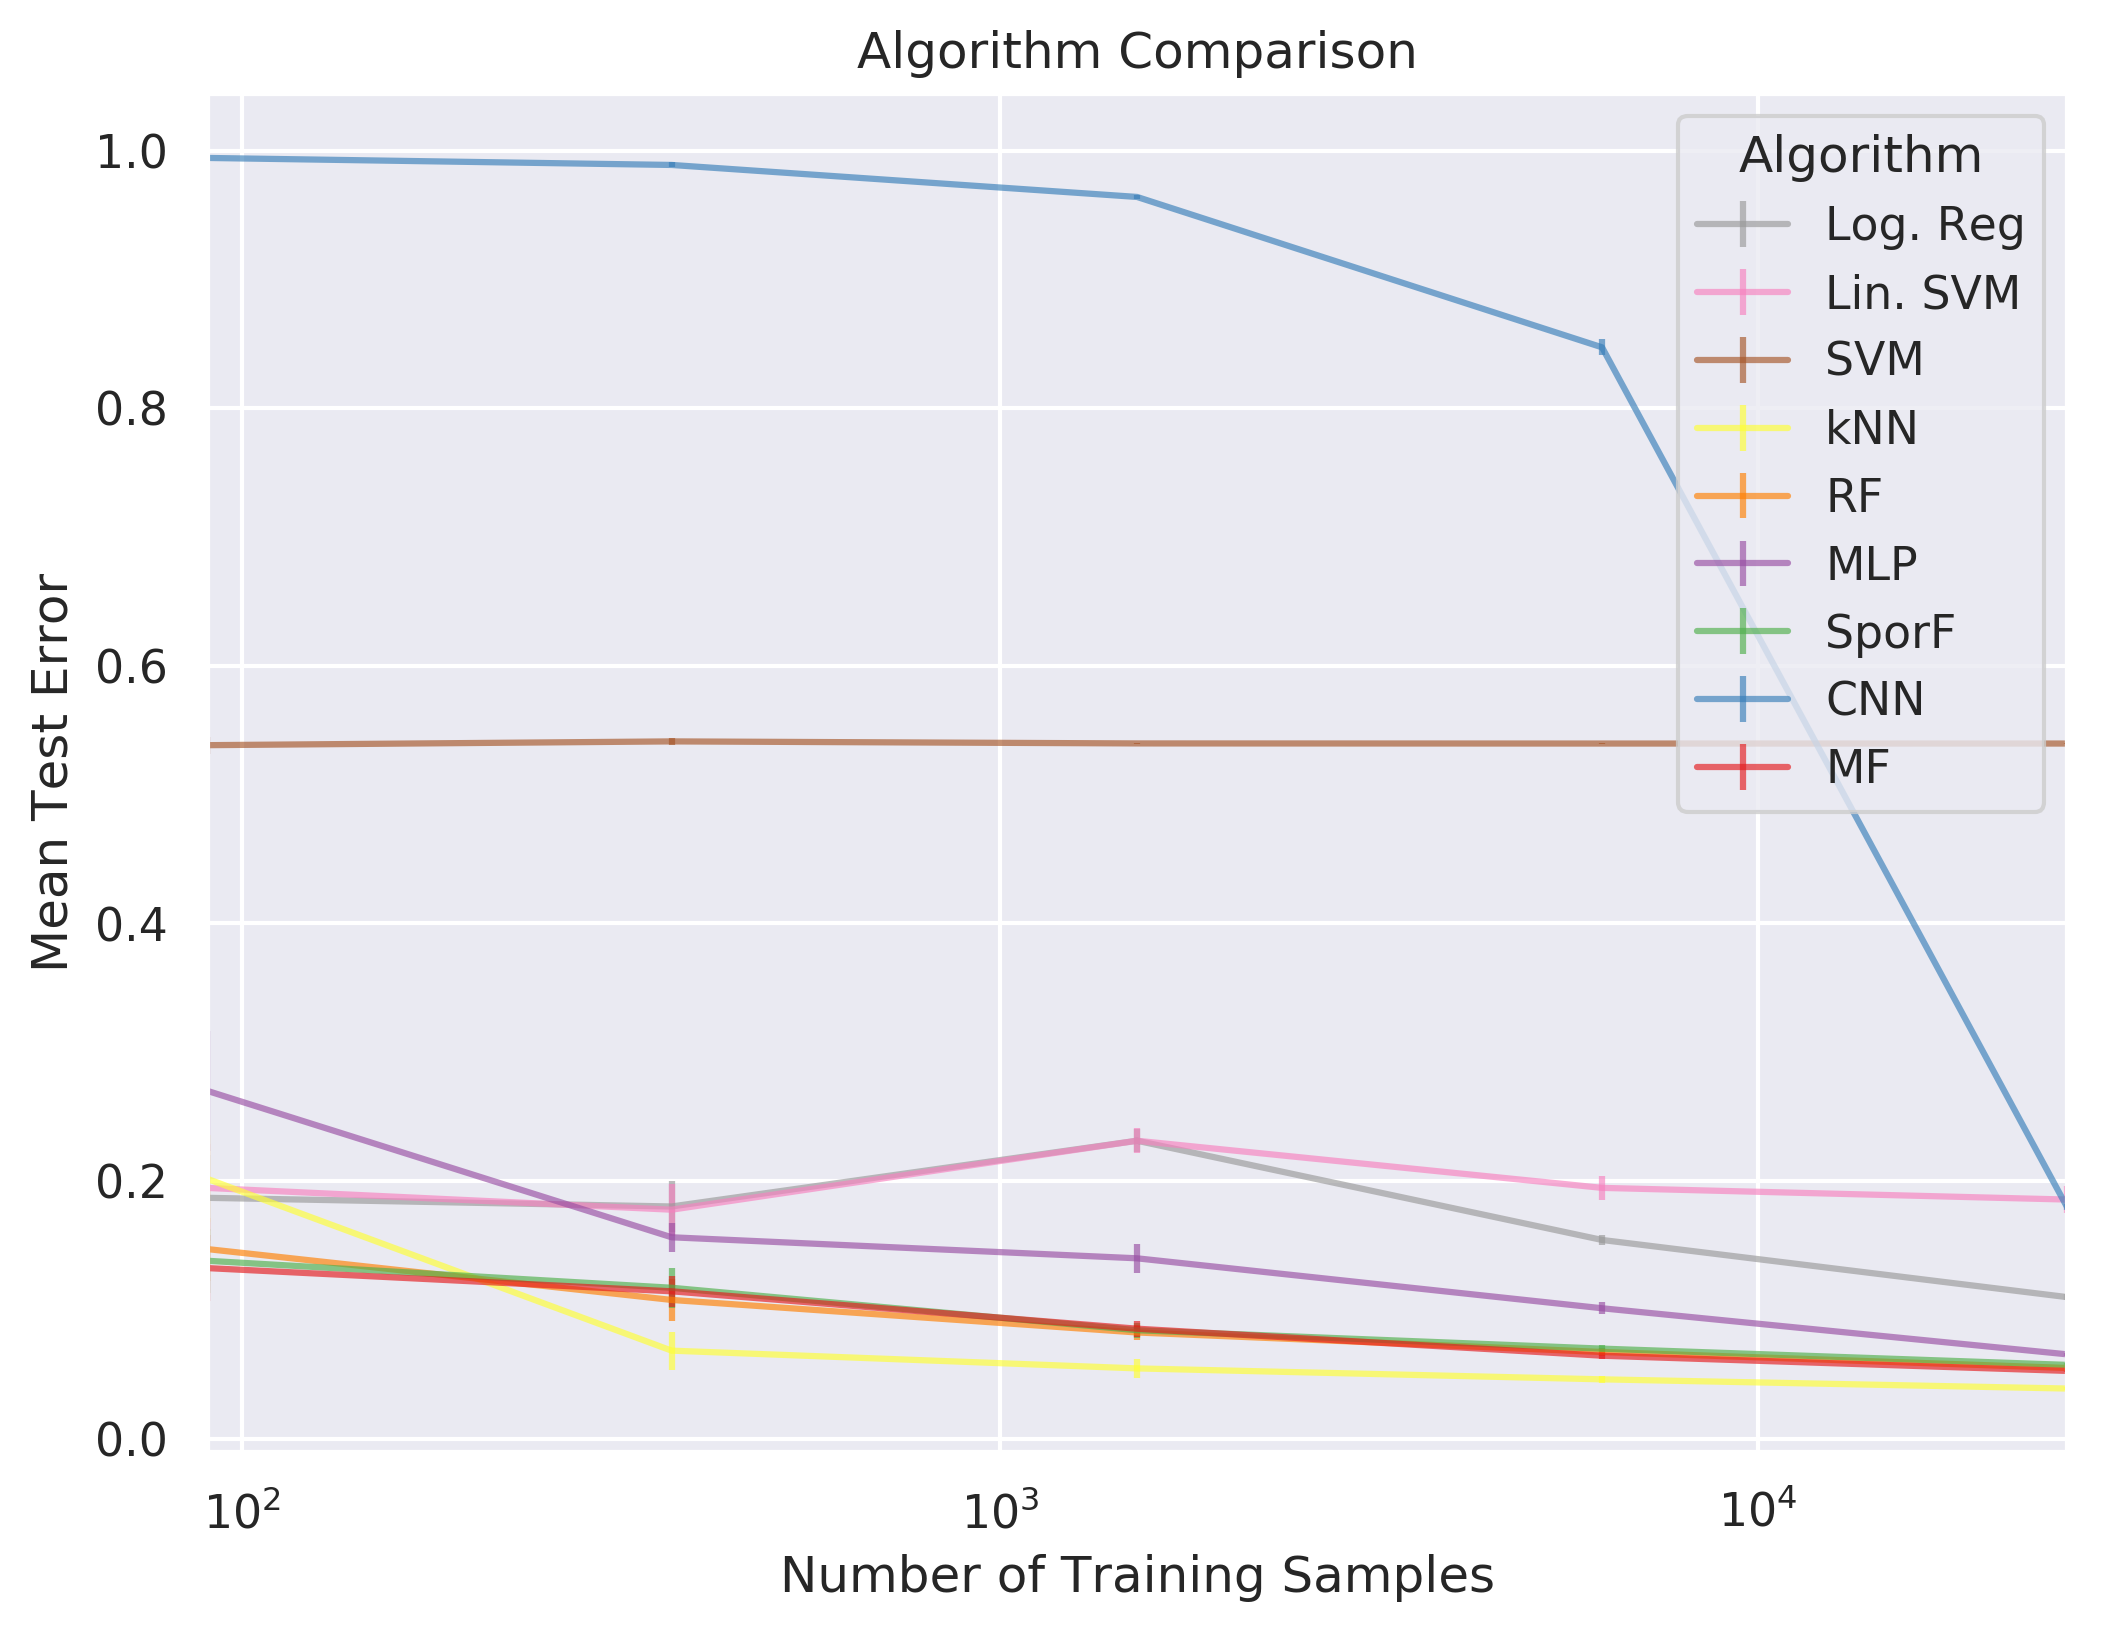

In [36]:
## Plot

k = 0
for ni in np.unique(dat['n']):
    for cl in np.unique(dat['classifier']):

        tmp = dat[np.logical_and(dat['classifier'] == cl,dat['n'] == ni)][['n', 'Lhat']]

        se = stats.sem(tmp['Lhat'])

        list(tmp.mean())
        d1.loc[k] = [cl] + list(tmp.mean()) + [se] + [names[cl]]
        k += 1


sns.set(style="darkgrid", rc={'figure.figsize':[12,8], 'figure.dpi': 300})
fig, ax = plt.subplots(figsize = (8,6))

for key in names.keys():
    grp = d1[d1['classifier'] == key]
    ax = grp.plot(ax=ax, kind='line', x='n', y='Lhat', label=key, \
            c = names[key], yerr='se', alpha =0.65)
    ax.set_xscale('log')

plt.legend(loc='upper right',title='Algorithm')
plt.title('Algorithm Comparison')
plt.ylabel('Mean Test Error')
plt.xlabel('Number of Training Samples')
plt.savefig(sim_dir / 'quickdraw_experiment.pdf',dpi=300,format='pdf')
plt.show()